In [1]:
import numpy as np
import pandas as pd
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
base_data= pd.read_csv("C:\\Users\\Admin\\Documents\\data.csv")

In [6]:
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [8]:
base_data.shape

(110527, 14)

In [10]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [15]:
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')


In [16]:
base_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
base_data['sch_weekday']= base_data['ScheduledDay'].dt.dayofweek
base_data['app_weekday']= base_data['AppointmentDay'].dt.dayofweek

In [20]:
base_data['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [21]:
base_data['app_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: app_weekday, dtype: int64

In [24]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'app_weekday', 'sch_weekday'],
      dtype='object')

In [36]:
base_data= base_data.rename(columns={'Hipertension':'Hypertension', 'handcap': 'Handicap','SMS_received':'SMSReceived','No-show':'Noshow'})

In [37]:
base_data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMSReceived',
       'Noshow', 'app_weekday', 'sch_weekday'],
      dtype='object')

In [38]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  int64         
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handcap         110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  Noshow          110527 non-null  object        
 11  app_weekday     110527 non-null  int64         
 12  sch_weekday     110527 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 11.0+ MB


In [39]:
base_data.drop(['PatientId','AppointmentID','Neighbourhood'], axis=1, inplace= True)

KeyError: "['PatientId', 'AppointmentID', 'Neighbourhood'] not found in axis"

In [40]:
base_data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMSReceived,Noshow,app_weekday,sch_weekday
0,F,2016-04-29,4,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,4,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,4,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,4,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,4,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,1,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,1,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,1,21,0,0,0,0,0,1,No,2,2
110525,F,2016-04-27,1,38,0,0,0,0,0,1,No,2,2


In [41]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  int64         
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handcap         110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  Noshow          110527 non-null  object        
 11  app_weekday     110527 non-null  int64         
 12  sch_weekday     110527 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 11.0+ MB


In [42]:
base_data.describe()

,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMSReceived,app_weekday,sch_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.858243,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.851955
std,1.371672,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.378520
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,3.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,5.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


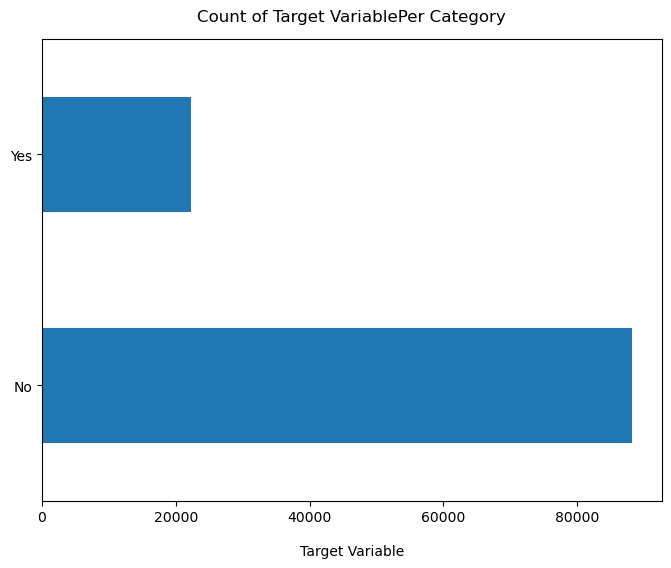

In [44]:
base_data['Noshow'].value_counts().plot(kind = 'barh', figsize=(8,6))
plt.xlabel("Count", labelpad =14)
plt.xlabel("Target Variable", labelpad =14)
plt.title("Count of Target VariablePer Category", y=1.02);


In [45]:
100*base_data['Noshow'].value_counts()/len(base_data['Noshow'])

No     79.806744
Yes    20.193256
Name: Noshow, dtype: float64

In [46]:
base_data['Noshow'].value_counts()

No     88208
Yes    22319
Name: Noshow, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


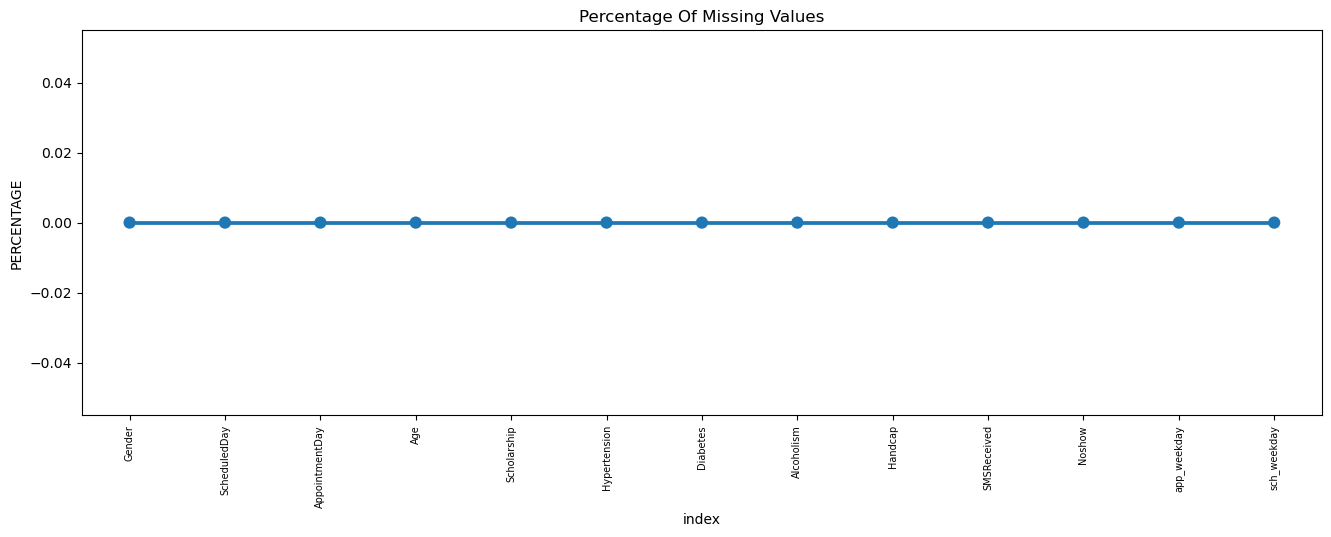

In [47]:
missing =pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0, data= missing)
plt.xticks(rotation= 90, fontsize = 7)
plt.title("Percentage Of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [48]:
new_data = base_data.copy()

In [49]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  int64         
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handcap         110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  Noshow          110527 non-null  object        
 11  app_weekday     110527 non-null  int64         
 12  sch_weekday     110527 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 11.0+ MB


In [50]:
print(base_data['Age'].max())

115


In [52]:
labels = ["{0}-{1}".format(i, i+20) for i in range(1,118,20)]
base_data['Age_group'] = pd.cut(base_data.Age, range(1,130,20), right= False, labels=labels)

In [53]:
base_data.drop(['Age'], axis=1, inplace= True)

In [54]:
list(base_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMSReceived',
 'Noshow',
 'app_weekday',
 'sch_weekday',
 'Age_group']

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0    99666
1    10861
Name: Scholarship, dtype: int64
---------- Hypertension ----------
0    88726
1    21801
Name: Hypertension, dtype: int64
---------- Diabetes ----------
0    102584
1      7943
Name: Diabetes, dtype: int64
---------- Alcoholism ----------
0    107167
1      3360
Name: Alcoholism, dtype: int64
---------- Handcap ----------
0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64
---------- SMSReceived ---

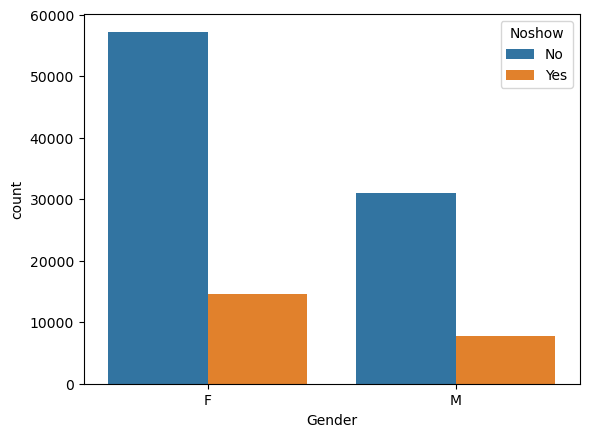

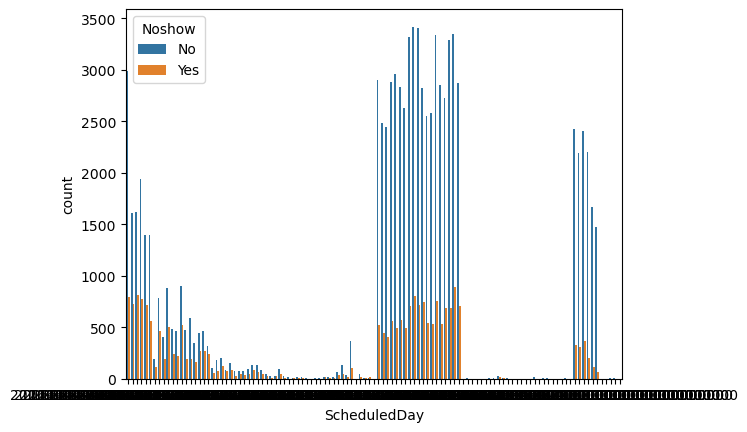

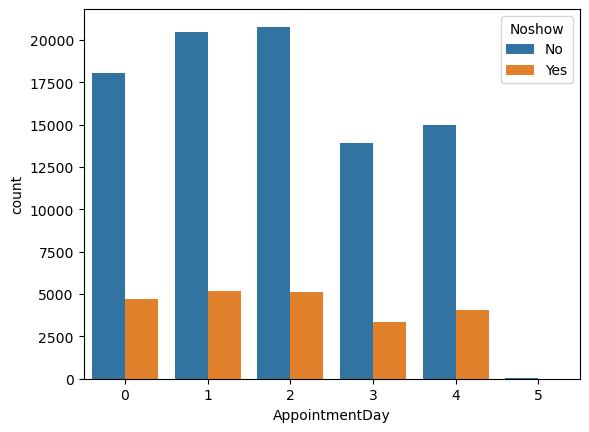

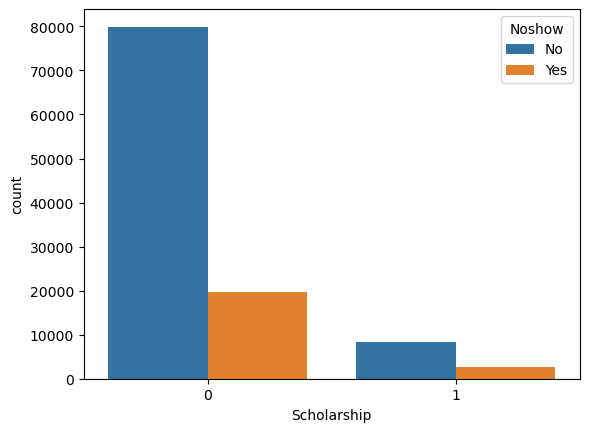

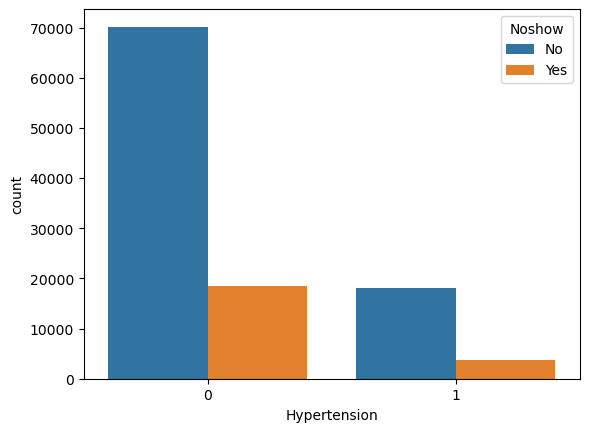

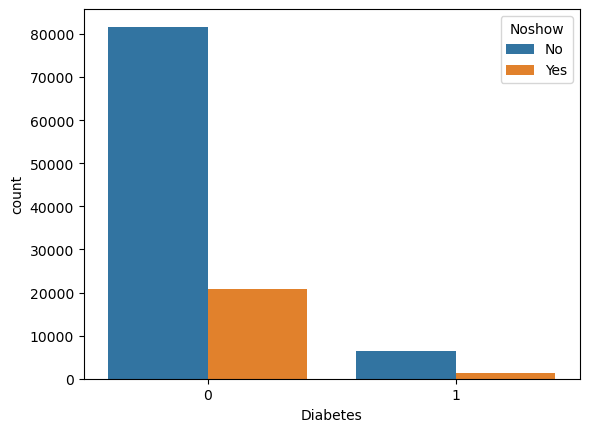

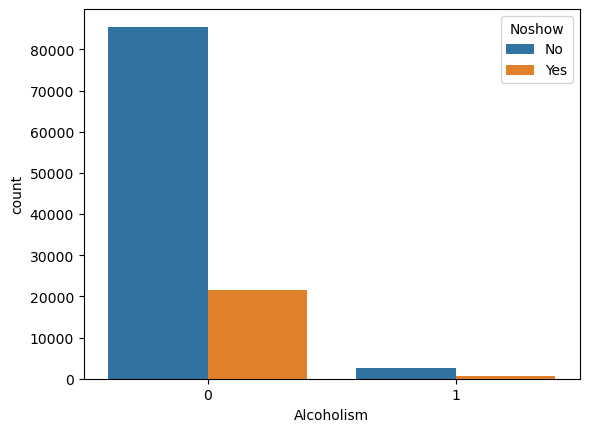

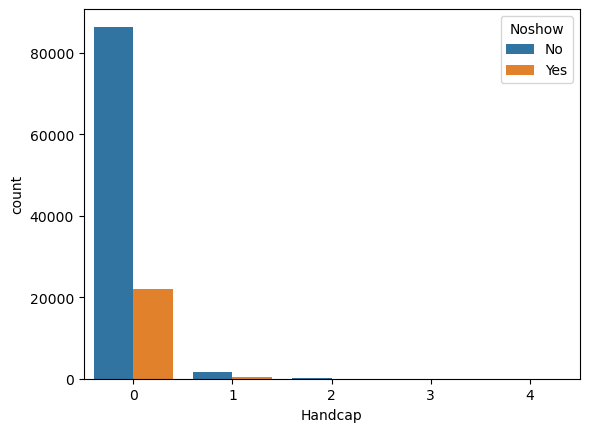

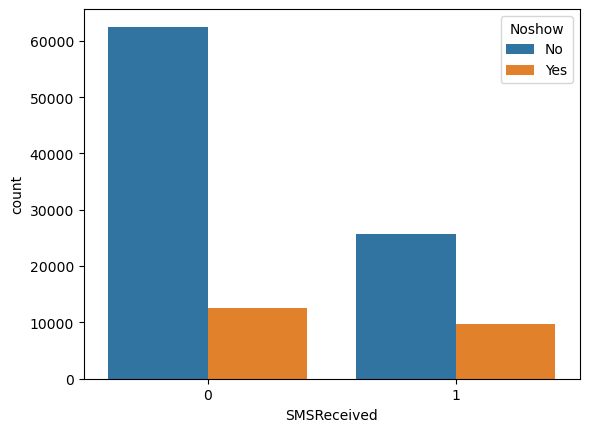

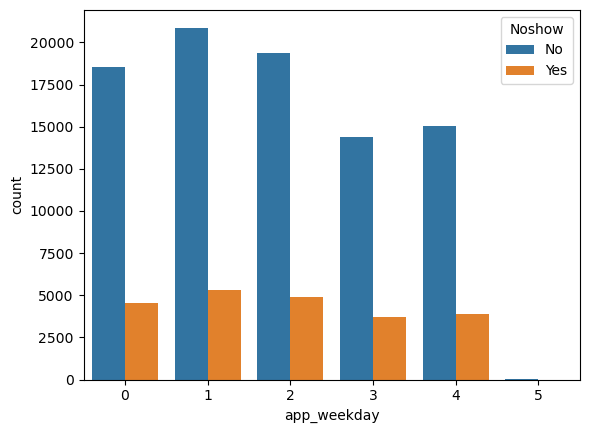

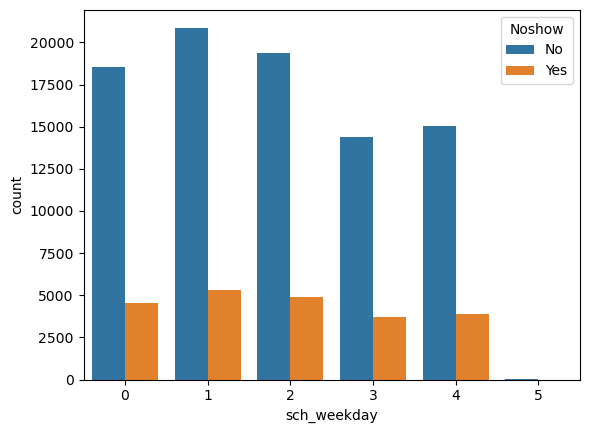

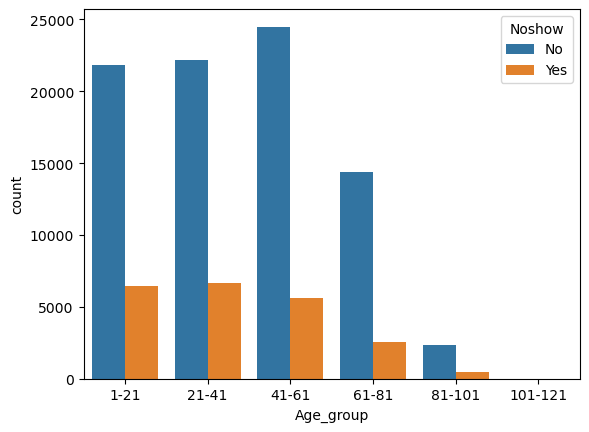

In [55]:
for i, predictor in enumerate(base_data.drop(columns=['Noshow'])):
    print('-'*10, predictor,'-'*10)
    print(base_data[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=base_data, x=predictor, hue='Noshow')

In [58]:
base_data['Noshow'] = np.where(base_data.Noshow=='Yes',1,0)
base_data.Noshow.value_counts()

0    88208
1    22319
Name: Noshow, dtype: int64

In [59]:
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMSReceived,Noshow,app_weekday,sch_weekday,Gender_F,Gender_M,Age_group_1-21,Age_group_21-41,Age_group_41-61,Age_group_61-81,Age_group_81-101,Age_group_101-121
0,2016-04-29,4,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,4,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,4,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,4,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,4,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


<AxesSubplot:>

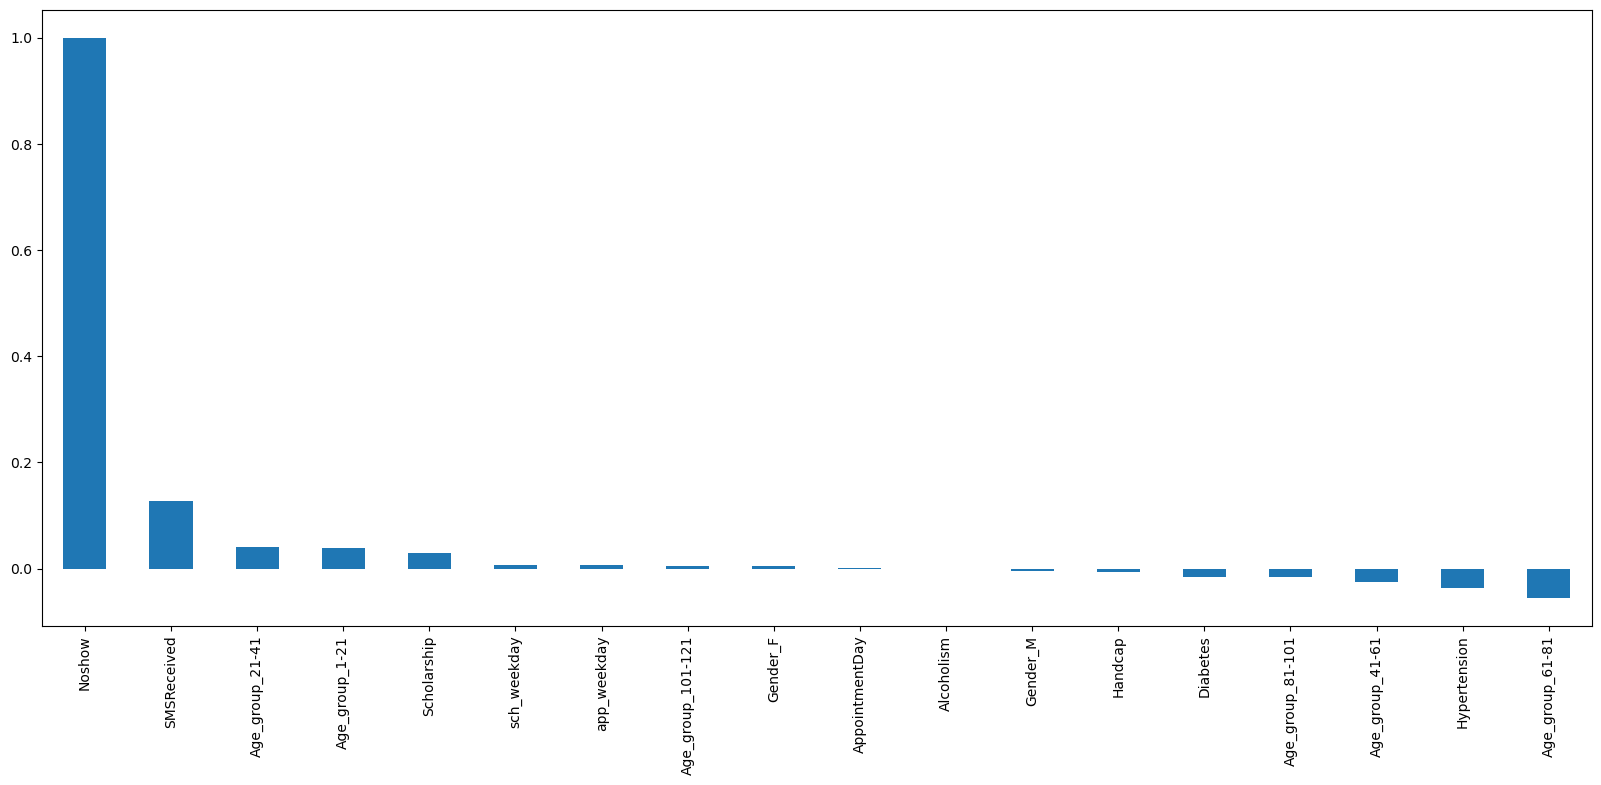

In [60]:
plt.figure(figsize=(20,8))
base_data_dummies.corr()['Noshow'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

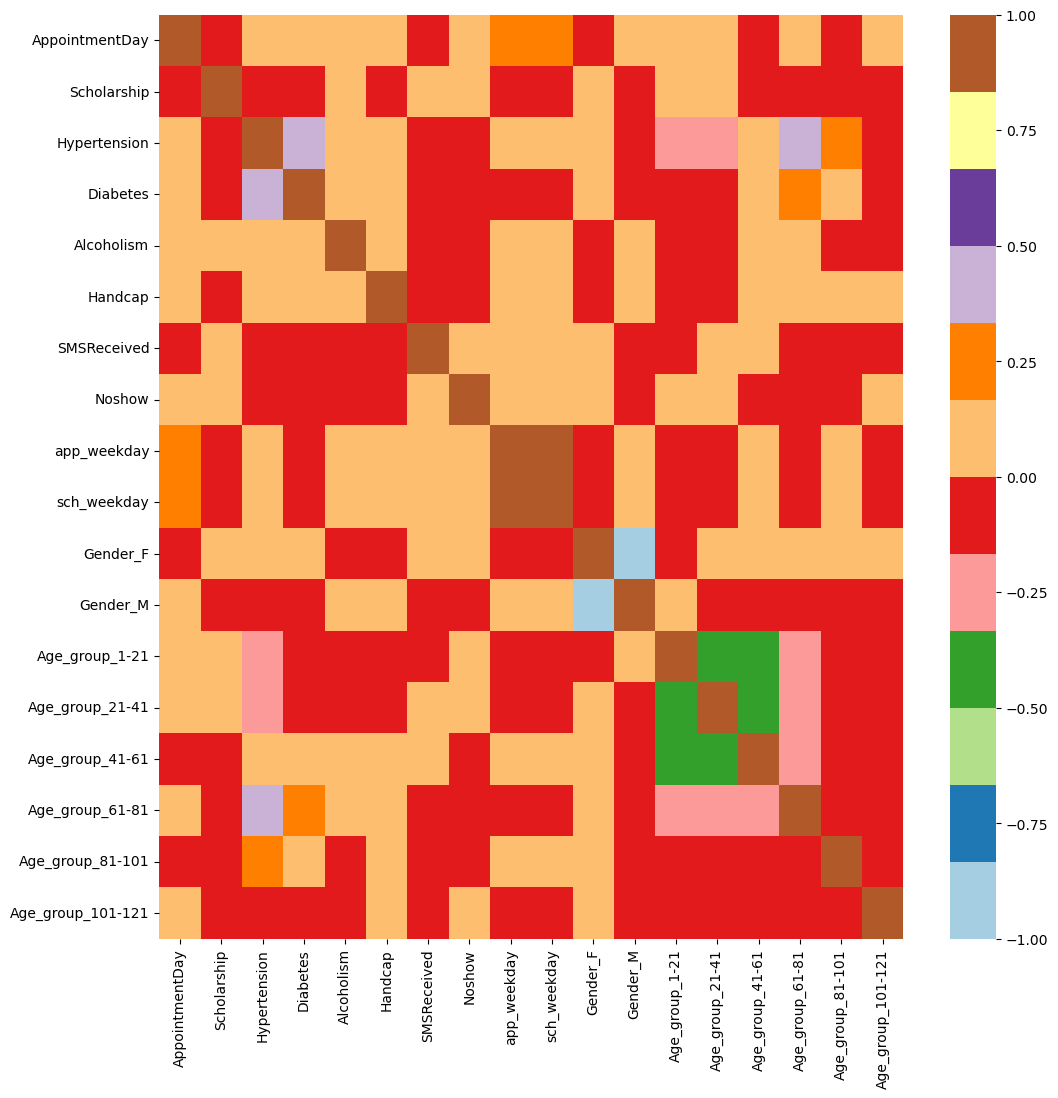

In [61]:
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies.corr(), cmap="Paired")

In [64]:
new_df1_target0=base_data.loc[base_data["Noshow"]==0]
new_df1_target1=base_data.loc[base_data["Noshow"]==1]

In [65]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

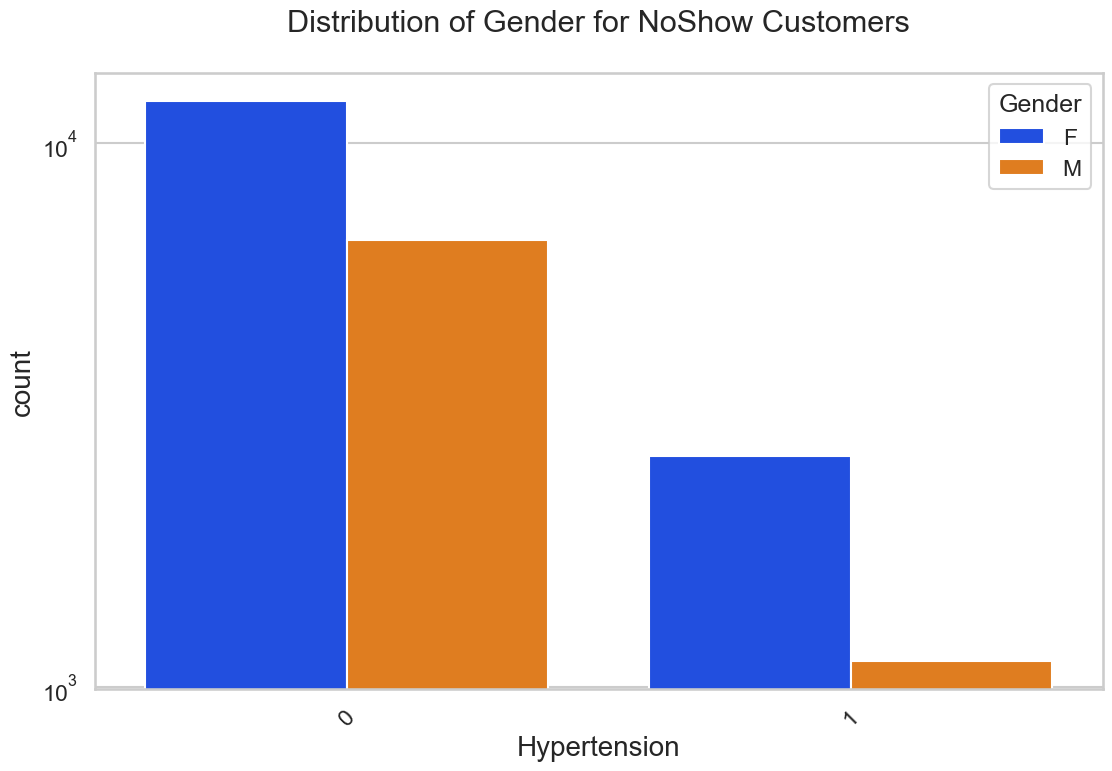

In [66]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

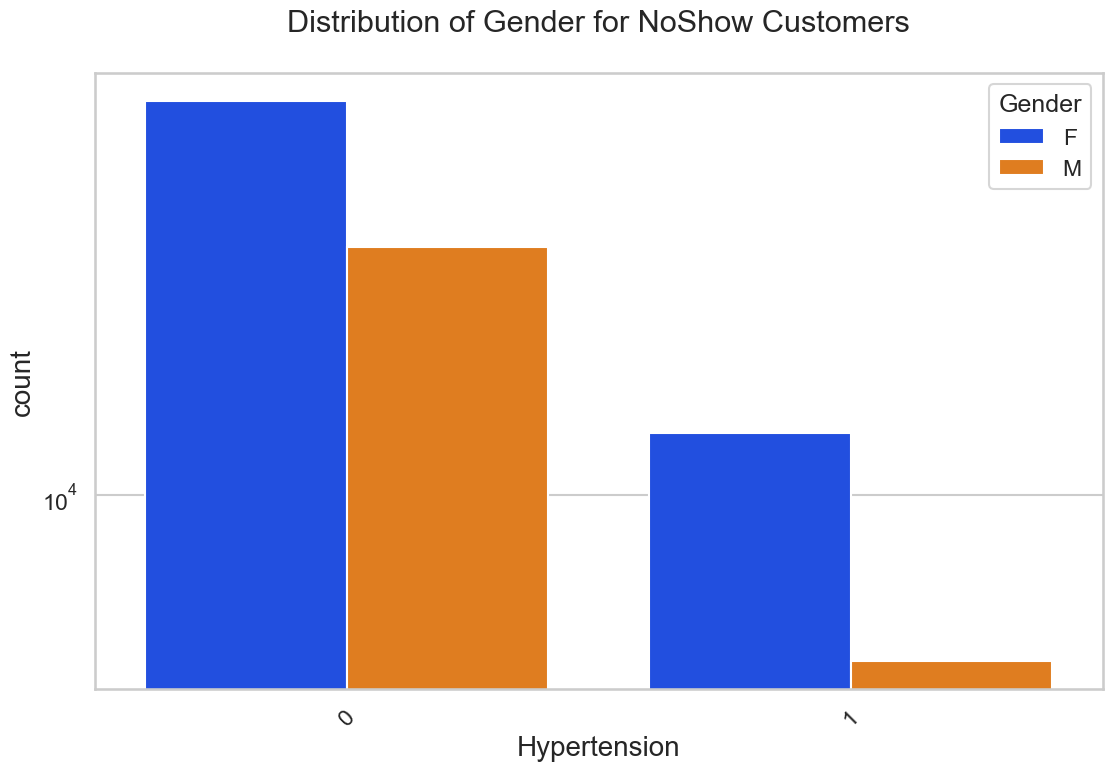

In [67]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

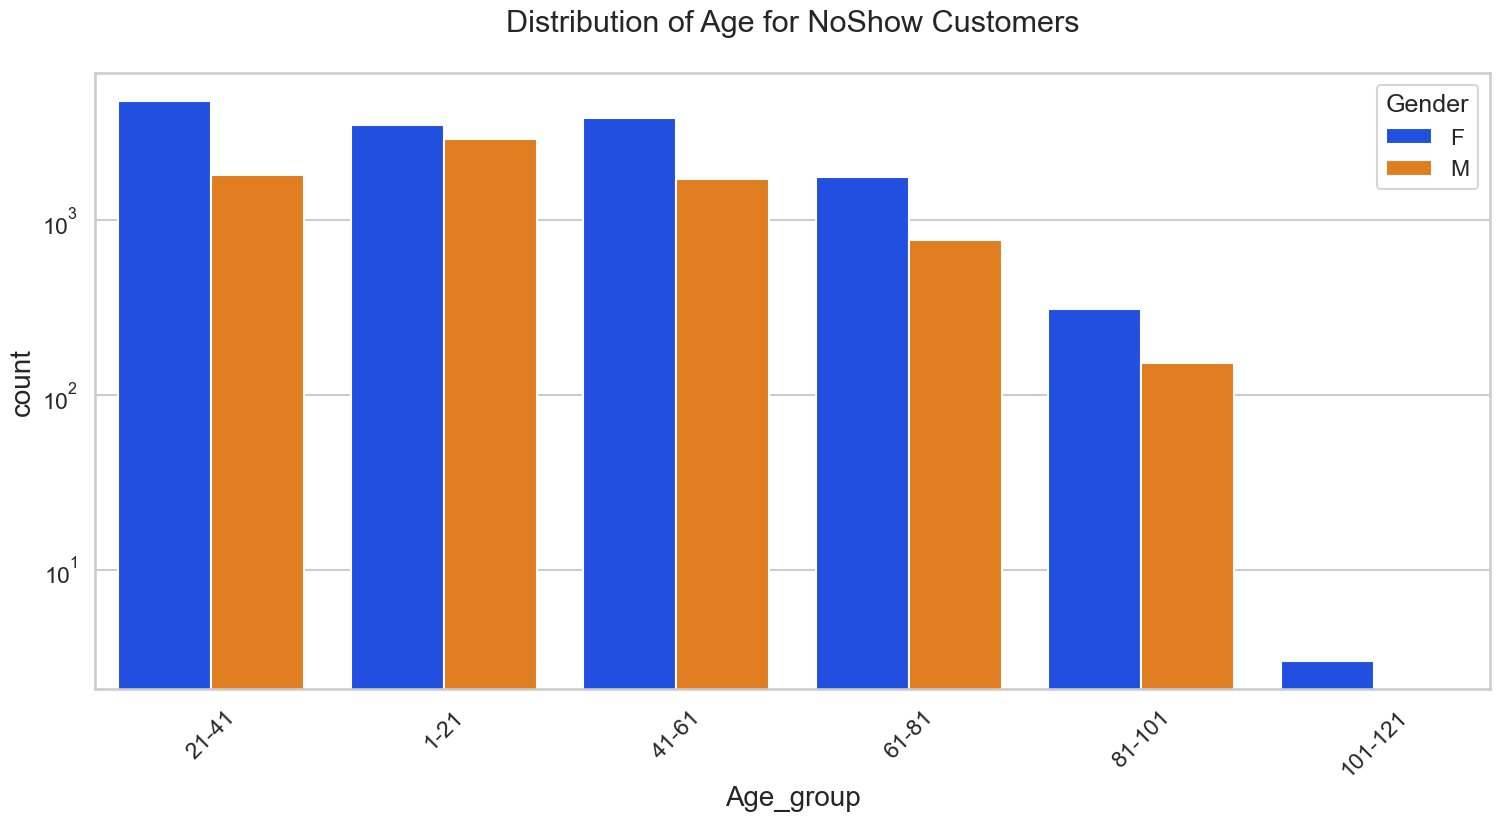

In [68]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

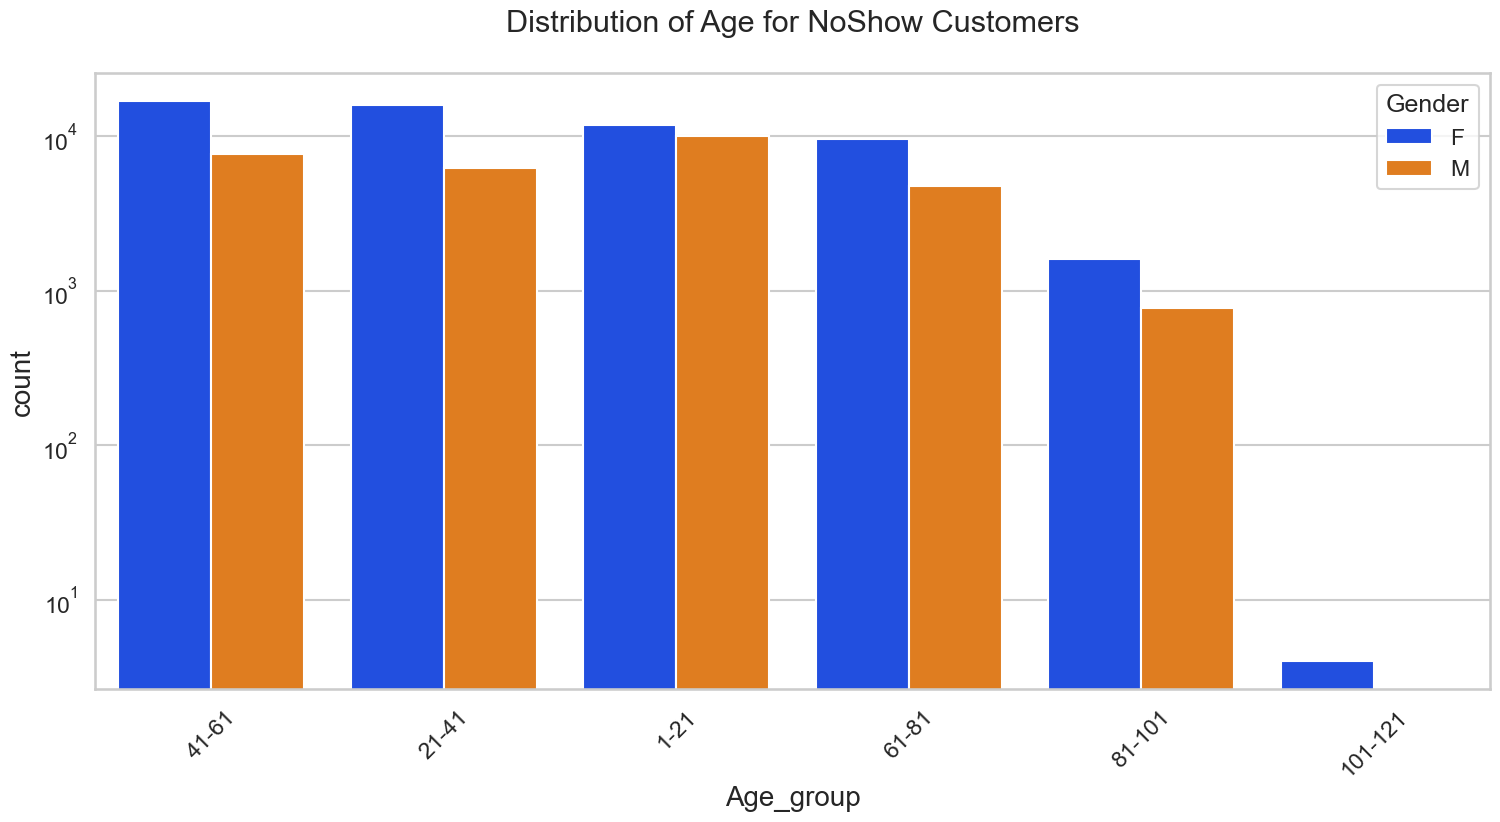

In [69]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

# Findings From Above EDA

1. Female patients have taken more appointments then male patients
2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
3. Each Neighbourhood have almost 80% show rate
4. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
5. there are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
6. there are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
7. there are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit. 
8. there is no appointments on sunday and on saturday appointments are very less in comparision to other week days 
